In [1]:
import pandas  as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Бутстрап

In [2]:
experimental = pd.Series(np.random.randint(100, 300, 800))

In [3]:
# frac - сколько именно случайных рядов нужно взять в долях от общего количества
# replace - взятие рядов берётся с повторением
experimental.sample(frac=1, replace=True)

492    272
375    157
88     298
61     242
310    115
      ... 
548    278
391    264
376    160
779    131
620    287
Length: 800, dtype: int32

In [4]:
#сюда мы будем складывать результаты
medians = []

#повторяем процесс 10000 раз
for i in range(10000):
    #симулируем выборку
    sample_data = experimental.sample(frac=1, replace=True)

    #считаем показатель - в данном случае медиану
    sample_median = sample_data.median()

    #добавляем результат в список
    medians.append(sample_median)
    
#  medians - список, в котором лежит распределение медиан

<AxesSubplot:ylabel='Count'>

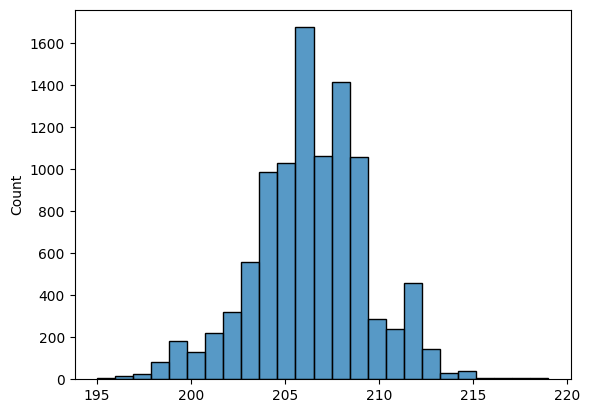

In [5]:
sns.histplot(medians, bins=25)

In [6]:
medians = pd.Series(medians)

# посчитаем 95% доверительный интервал
[medians.quantile(0.025), medians.quantile(0.975)]

[199.0, 212.0]

### Готовые реализации бутстрапа

In [7]:
res = stats.bootstrap(data=(experimental, ), statistic=np.median, n_resamples=9999, confidence_level=0.95)
res

BootstrapResult(confidence_interval=ConfidenceInterval(low=199.25260127073673, high=212.5), bootstrap_distribution=array([207. , 206.5, 218. , ..., 206. , 207. , 208. ]), standard_error=3.0739009493047265)

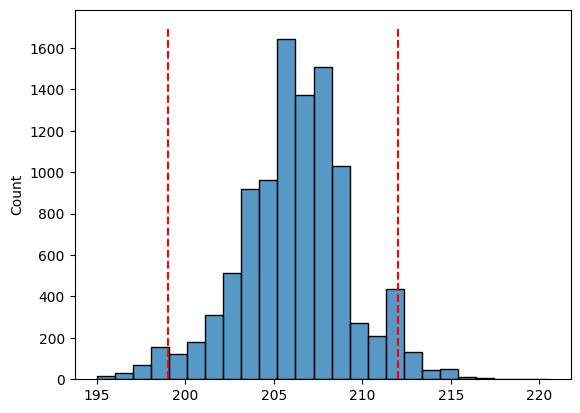

In [13]:
sns.histplot(res.bootstrap_distribution, bins=25)
plt.vlines(199, ymin=0, ymax=1700, colors='r', linestyles='--')
plt.vlines(212, ymin=0, ymax=1700, colors='r', linestyles='--')

In [9]:
std_sample = np.mean(res.bootstrap_distribution)
stats.norm.interval(0.95, loc=std_sample, scale=res.standard_error)

(200.36920424125867, 212.41867454662014)